# Eksempel p? Newtons metode (og sekantmetoden)

## IN-KJM1900 Forelesning 30. oktober 2018

---

Vi ser p? funksjonen

\begin{equation}
f(x) = -x^3 + 5x^2 - 6x
\end{equation}

Dens deriverte er

\begin{equation}
f'(x) = -3x^2 + 10x - 6
\end{equation}

Vi ?nsker ? finne funksjonens r?tter, alts? punktene $x_*$ som er slik at 

$$f(x_*) = 0$$

I det f?lgende vil vi
1. Definere funksjonen og dens deriverte som evaluerbare python-funksjoner.
2. Gj?re en visuell deteksjon av r?ttene ved ? plotte funksjonene i matplotlib.
3. Implementere Newtons metode og bruke den til ? finne r?ttene.
4. Implementere Sekantmetoden og bruke den til ? finne r?ttene.
5. Vise noen patologiske eksempler hvor metoden feiler.

## Definisjon av funksjon og dens deriverte

Vi m? f?rst benytte enten def-statements eller lambdafunksjoner for ? definere funksjonene. Dette gj?r vi i cellen under.

In [32]:
def f(x):
    return -x**3 + 5*x**2 - 6*x

def df(x):
    return -3*x**2 + 10*x - 6
    
    

## Visuell deteksjon av r?ttene

N?r funksjonene er definert kan vi benytte `matplotlib` for ? visualisere dem. Vi gj?r dette i cellen under.

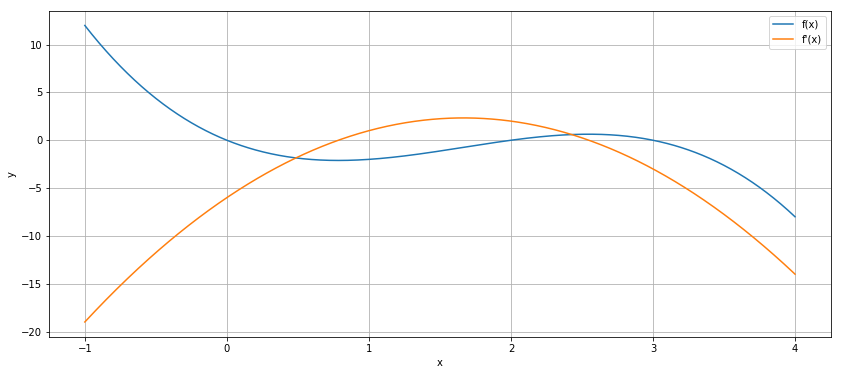

In [34]:
# First import required modules

import matplotlib.pyplot as plt # visuals
 
import numpy as np # numerics


x = np.linspace(-1,4, 1000) #define region of interest, dicrete mesh on x

#plot function and its derivative
plt.figure(1, figsize = (14,6))
plt.plot(x, f(x), label = "f(x)") 
plt.plot(x, df(x), label = "f'(x)")
plt.xlabel("x") #label axes
plt.ylabel("y")
plt.grid()   # show gridlines for y = 0
plt.legend() # 
plt.show() #display on screen



## Newtons metode

Vi ?nsker n? ? bestemme r?ttene ved hjelp av Newtons metode. For en hvilken som som helst jevn funksjon $f(x)$ lar metoden oss finne en rot $x_*$ slik at 

$$f(x_*) = 0$$

Den formelle beskrivelsen er at vi f?rst gjetter p? en $x_0$, og deretter gjentar f?lgende operasjon

$$ x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_{n})}$$

Vi gjentar frem til enten et maksimalt antall interasjoner er n?dd, eller absoluttverdien $ \vert f(x_{n+1}) \vert $ er mindre enn en grenseverdi:

$$ \vert f(x_{n+1}) \vert \le \epsilon$$

Vi implementerer metoden som en funksjon i cellen under.

In [39]:
def newton_solve(f, df, x0, maxiter = 100, epsilon = 10e-6):
    """
    Implementation of Newton's method
    
    f  = function for which to identify roots
    df = derivative of function
    x0 = initial guess 
    maxiter = max number of iterations
    epsiln  = convergence threshold 
    """
    x_prev = x0
    
    for i in np.arange(maxiter):
        # Newton iterations 
        
        # Break if x_prev is a root
        if np.abs(f(x_prev))<=epsilon:
            break
        
        # Compute next x
        x_new = x_prev - f(x_prev)/df(x_prev)
        
        

        #update x / jump to tangent root
        x_prev = x_new 
    
    #return root
    return x_new
        

## Testing av metoden

Vi tester i cellen under at metoden returnerer r?tter som svarer til det vi fant visuelt n?r vi plottet funksjonen over.

In [67]:

x0 = 1.0

x_root = newton_solve(f,df, x0)

print("x_* = ", x_root)



x_* =  3.0


<h2>Sekantmetoden</h2>

<p></p>
Ikke alle funksjoner er enkle ? derivere.
<p></p>
Om vi erstatter den deriverte i Newtons metode med en numerisk differanse f?r vi en variasjon av Newtons metode som kalles <i>sekantmetoden</i>:
            <p></p>
$$ x_{n+1} \approx x_{n} - \frac{f(x_n)}{\mathbf{D}^+f(x_n)} = x_{n} - \frac{f(x_n)}{f(x_n + \Delta x) - f(x_n)}\Delta x $$
<p></p>
I cellen under kopierer vi `newton_solve` slik vi implementerte den over, men erstatter den deriverte med en numerisk approksimasjon. 

In [82]:
# definer D+ operatoren / "fremad-differansen"

def Dp(f,xn, dx):
    return (f(xn+dx)-f(xn))/dx

def secant_solve(f, x0, maxiter = 100, epsilon = 10e-6, dx = .01):
    """
    Implementation of the Secant-method
    
    f  = function for which to identify roots
    x0 = initial guess 
    maxiter = max number of iterations
    epsiln  = convergence threshold 
    """
    x_prev = x0
    
    for i in np.arange(maxiter):
        # Secant iterations 
        
        # Break if x_prev is a root
        if np.abs(f(x_prev))<=epsilon:
            break
        
        # Compute next x
        x_new = x_prev - f(x_prev)/Dp(f, x_prev, dx)
        
        

        #update x / jump to tangent root
        x_prev = x_new 
    
    #return root
    return x_new
        

In [84]:
# Testing the Secant method

x0 = 1.0

x_root = secant_solve(f, x0)

print("x_* = ", x_root)

x_* =  3.0000003295832918
